<a href="https://colab.research.google.com/github/juannMGC/ING-SOFTWARE-II/blob/main/Sprint1/RedNeuronalTrasporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import numpy as np
import xml.etree.ElementTree as ET
import tkinter as tk
import seaborn as sns
import plotly.express as px
import tensorflow
from tkinter import ttk
from tkinter import filedialog
from tkinter import messagebox
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense


LECTURA DATA SET

In [ ]:
def leer_excel(ruta_archivo):
    try:
        # Lee el archivo de Excel
        datos = pd.read_excel(ruta_archivo, engine='openpyxl')

        # Imprime los datos en pantalla
        print("Contenido del archivo de Excel:")
        print(datos)

        return datos

    except Exception as e:
        print(f"Error al leer el archivo: {e}")
        return None

# Ejemplo de uso de la función
archivo_excel = "DataNovenoProcesamientoVx.xlsx"
datos = leer_excel(archivo_excel)

Contenido del archivo de Excel:
       Ruta  Hora  Dia  Cond_Ruta  #Veh_Disp_x_rut  demanda  DistRut_Km  \
0         1     3    3          1                5        2       13.61   
1         1     3    3          2                5        2       13.61   
2         1     3    3          3                5        2       13.61   
3         1     3    3          1                5        2       13.61   
4         1     3    3          2                5        2       13.61   
...     ...   ...  ...        ...              ...      ...         ...   
25699    68     1    1          2                2        1       17.78   
25700    68     1    1          3                2        1       17.78   
25701    68     1    1          1                2        1       17.78   
25702    68     1    1          2                2        1       17.78   
25703    68     1    1          3                2        1       17.78   

       TimeRuta  PromPasDia  
0            28        1566  
1      

Min Max para normalizar

In [ ]:
# Cargar el archivo Excel
archivo_excel = "DataNovenoProcesamientoVx.xlsx"
data = pd.read_excel(archivo_excel)

# Definir los rangos específicos para cada columna
rangos = {
    "Ruta": (1, 60),
    "Hora": (1, 3),
    "Dia": (1, 3),
    "Cond_Ruta": (1, 3),
    "#Veh_Disp_x_rut": (2, 4),
    "demanda": (1, 3),
    "DistRut_Km": (7, 22.6),
    "TimeRuta": (11, 55),
    "PromPasDia":(72, 4884)
}

# Normalizar las columnas utilizando Min-Max
scaler = MinMaxScaler()

for columna, (min_valor, max_valor) in rangos.items():
    columna_data = data[[columna]].values.reshape(-1, 1)
    data[columna] = scaler.fit_transform(columna_data) * (max_valor - min_valor) + min_valor

# Guardar los datos normalizados en un nuevo archivo Excel
data.to_excel("DataDecimoProcesamientoVx_Normalizado.xlsx", index=False)


In [ ]:
# Muestra las primeras filas del DataFrame para verificar la normalización de #Veh_x_rut
print(datos.head())

   Ruta  Hora  Dia  Cond_Ruta  #Veh_Disp_x_rut  demanda  DistRut_Km  TimeRuta  \
0     1     3    3          1                5        2       13.61        28   
1     1     3    3          2                5        2       13.61        28   
2     1     3    3          3                5        2       13.61        28   
3     1     3    3          1                5        2       13.61        28   
4     1     3    3          2                5        2       13.61        28   

   PromPasDia  
0        1566  
1        1566  
2        1566  
3        1566  
4        1566  


In [ ]:
corr_matrix = datos.corr()#matriz de correlación
corr_matrix.style.background_gradient(cmap='coolwarm')

,Ruta,Hora,Dia,Cond_Ruta,#Veh_Disp_x_rut,demanda,DistRut_Km,TimeRuta,PromPasDia
Ruta,1.000000,0.000000,-0.000000,0.000000,-0.258481,-0.163816,-0.041726,0.059432,-0.208883
Hora,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000
Dia,-0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cond_Ruta,0.000000,-0.000000,-0.000000,1.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
#Veh_Disp_x_rut,-0.258481,0.000000,0.000000,-0.000000,1.000000,0.680870,0.195686,0.167796,0.753286
demanda,-0.163816,0.000000,0.000000,-0.000000,0.680870,1.000000,0.147326,0.141765,0.740168
DistRut_Km,-0.041726,0.000000,0.000000,-0.000000,0.195686,0.147326,1.000000,0.698542,0.254852
TimeRuta,0.059432,-0.000000,0.000000,-0.000000,0.167796,0.141765,0.698542,1.000000,0.266728
PromPasDia,-0.208883,0.000000,0.000000,-0.000000,0.753286,0.740168,0.254852,0.266728,1.000000


In [ ]:
col_drop = ['Ruta','Hora','Dia','Cond_Ruta'] #no contienen información de interes o es confusa
datos.drop(columns = col_drop, inplace = True)
datos.head()

,#Veh_Disp_x_rut,demanda,DistRut_Km,TimeRuta,PromPasDia
0,5,2,13.61,28,1566
1,5,2,13.61,28,1566
2,5,2,13.61,28,1566
3,5,2,13.61,28,1566
4,5,2,13.61,28,1566


In [ ]:
datos

,#Veh_Disp_x_rut,demanda,DistRut_Km,TimeRuta,PromPasDia
0,5,2,13.61,28,1566
1,5,2,13.61,28,1566
2,5,2,13.61,28,1566
3,5,2,13.61,28,1566
4,5,2,13.61,28,1566
...,...,...,...,...,...
25699,2,1,17.78,50,96
25700,2,1,17.78,50,96
25701,2,1,17.78,50,96
25702,2,1,17.78,50,96



SEPARACION DE CARACTERISTICAS Y ETIQUETAS

In [ ]:
from sklearn.model_selection import StratifiedKFold
# Se define el número de folds para la validación cruzada
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
X = datos[['#Veh_Disp_x_rut', "DistRut_Km",	"TimeRuta","PromPasDia"]]
Y = datos[['demanda']]

DIVISION DE DATOS: Validacion Cruzada k=

In [ ]:

# Se inicializa una lista para almacenar los porcentajes de pérdida en cada fold
porcentajes_perdida = []
from sklearn.model_selection import train_test_split
# Itera sobre los folds de la validación cruzada
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

#X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=42)

FASE DE DISEÑO DE LA MLP  

In [ ]:
from keras.metrics import RootMeanSquaredError
model = Sequential()

# Se agrega capa inicial con 4 Neuronas y función de activación "relu"
model.add(Dense(units=4, input_dim=4, activation='relu'))

# Se agregan más capas si es necesario
model.add(Dense(units=3, activation='relu'))
model.add(Dense(units=3, activation='relu'))
model.add(Dense(units=1, activation= 'linear'))

# Se crea un optimizador Adam con tasa de aprendizaje = 0.01
custom_optimizer = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])

model.fit(X_train, Y_train, epochs=10, batch_size=64, verbose=0)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 3)                 15        
                                                                 
 dense_6 (Dense)             (None, 3)                 12        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


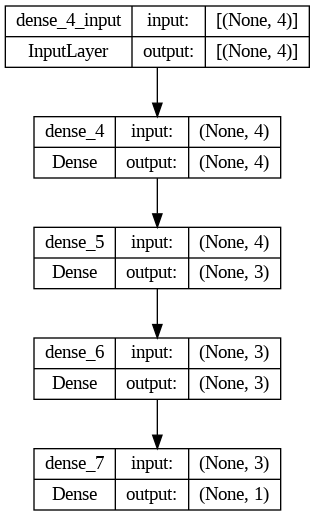

In [ ]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

Una vez establecida la arquitectura del modelo, es el momento de entrenar el modelo. Podemos ajustar los hiperparímetros: epoch (el número de iteraciones de entrenamiento) y batch_size (el número de filas a incluir en una sola propagación hacia adelante y hacia atrás). Incluiremos una división de validación de 0.1 (de forma predeterminada, tomará el 10% de las últimas filas y las usará como datos de validación, que no se usan para el entrenamiento, pero podemos usarlas para evaluar datos no vistos para cada paso dado).



In [ ]:
# Entrenar el modelo
history = model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5747 - root_mean_squared_error: 0.7581 - val_loss: 0.5838 - val_root_mean_squared_error: 0.7641
Epoch 2/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5567 - root_mean_squared_error: 0.7461 - val_loss: 0.5678 - val_root_mean_squared_error: 0.7535
Epoch 3/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5419 - root_mean_squared_error: 0.7362 - val_loss: 0.5540 - val_root_mean_squared_error: 0.7443
Epoch 4/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5285 - root_mean_squared_error: 0.7270 - val_loss: 0.5397 - val_root_mean_squared_error: 0.7346
Epoch 5/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5142 - root_mean_squared_error: 0.7171 - val_loss: 0.5239 - val_root_mean_squared_error: 0.7238
Epoch 6/10
322/322 [==============================] - 1s 3ms/step - loss: 0.4983 - root_mean_squared_error: 0.7059 - val_loss: 0.5073 - val_

Después de ajustar nuestro conjunto de entrenamiento con el modelo, podemos evaluar si nuestro modelo se ajusta demasiado al conjunto de entrenamiento o no. Una forma de hacerlo es trazando las funciones de pérdida en cada paso del entrenamiento.

In [ ]:
def plot_training(training_history, text, width):
    history = training_history.history[text]

    # creates a moving average plot to reduce variations
    moving_average = [float("NaN") for i in range(width)]
    for i in range(width, len(history)+1):
        moving_average.append(np.mean(np.array(history[i-width:i+1])))

    plt.plot(history)
    plt.plot(moving_average)
    plt.title(text)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['value','moving average'], loc='upper left')
    plt.show()

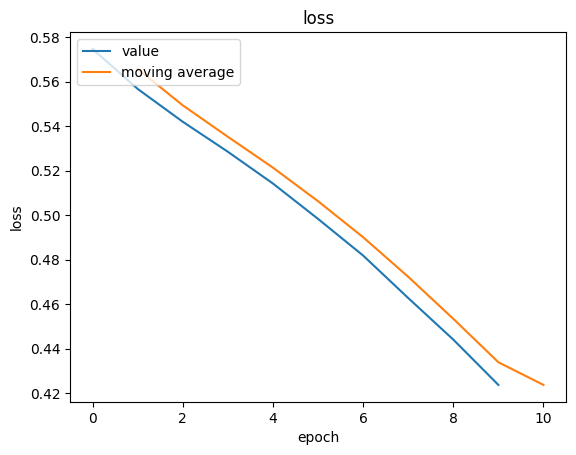

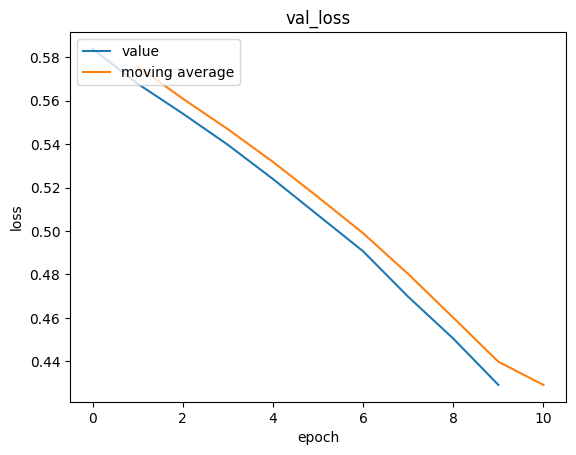

In [ ]:
# Plots the loss (MSE and RMSE) of both test and validation data
WIDTH = 1
plot_training(history,'loss',WIDTH)
plot_training(history,'val_loss',WIDTH)
#plot_training(history,'val_root_mean_squared_error',WIDTH)
#plot_training(history,'root_mean_squared_error',WIDTH)

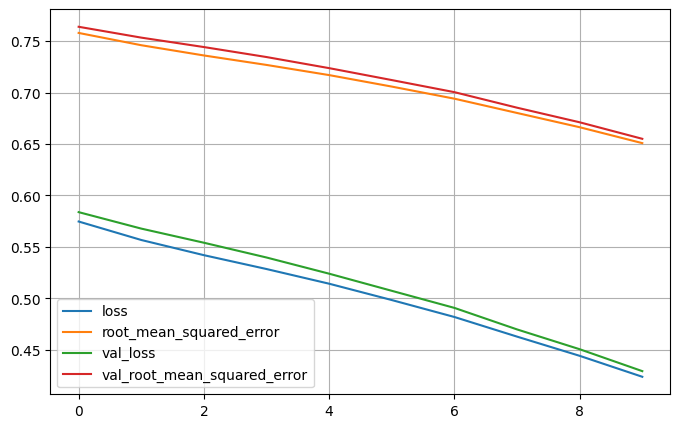

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(10,19000000000)
plt.show()

In [ ]:
predicted_y_DeepL = model.predict(X_test)

161/161 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(Y_test, predicted_y_DeepL)
print(lin_mae)

0.45005467919060227


In [ ]:
from sklearn.metrics import r2_score
r2_Deep = r2_score(Y_test,predicted_y_DeepL)
print('r2 para el modelo deep learning', r2_Deep)

r2 para el modelo deep learning 0.25415804596552105


In [ ]:
'''------------SEGUNDA MATRIZ DE CORRELACIONES-------------'''
Xtrain_pre2 = datos.copy()
Xtrain_pre2['output'] = Y_train  #Recordems que output es la variable de desicion
corr_matrix2 = Xtrain_pre2.corr()#matriz de correlación
corr_matrix2.style.background_gradient(cmap='coolwarm')


,#Veh_Disp_x_rut,demanda,DistRut_Km,TimeRuta,PromPasDia,output
#Veh_Disp_x_rut,1.000000,0.680870,0.195686,0.167796,0.753286,0.683688
demanda,0.680870,1.000000,0.147326,0.141765,0.740168,1.000000
DistRut_Km,0.195686,0.147326,1.000000,0.698542,0.254852,0.146768
TimeRuta,0.167796,0.141765,0.698542,1.000000,0.266728,0.143927
PromPasDia,0.753286,0.740168,0.254852,0.266728,1.000000,0.742603
output,0.683688,1.000000,0.146768,0.143927,0.742603,1.000000


In [ ]:
# Evalúa el modelo y calcula el error cuadrático medio
predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
# Calcula y almacena el porcentaje de pérdida para este fold
rango_etiquetas = 3 - 1
porcentaje_perdida = (mse / rango_etiquetas) * 100
porcentajes_perdida.append(porcentaje_perdida)

# Calcula y muestra el promedio del porcentaje de pérdida en los 5 folds
promedio_perdida = sum(porcentajes_perdida) / len(porcentajes_perdida)
print(f"Porcentaje de error promedio en los 5 folds: {promedio_perdida:.2f}%")

161/161 [==============================] - 0s 1ms/step
Porcentaje de error promedio en los 5 folds: 21.46%


FASE DE PRODUCCION

In [ ]:
loss = model.evaluate(X_test, Y_test)
# Calcular el porcentaje de pérdida
rango_etiquetas = 3 - 1  # Rango de las etiquetas (de 1 a 3 en este caso)
 # Calcular el porcentaje de pérdida
porcentaje_perdida = (loss[0] / rango_etiquetas) * 100
#porcentaje_perdida = (loss / rango_etiquetas) * 100

# Mostrar el porcentaje de pérdida
print(f"Porcentaje de error en el conjunto de prueba: {porcentaje_perdida:.2f}%")


161/161 [==============================] - 0s 2ms/step - loss: 0.4292 - root_mean_squared_error: 0.6551
Porcentaje de error en el conjunto de prueba: 21.46%


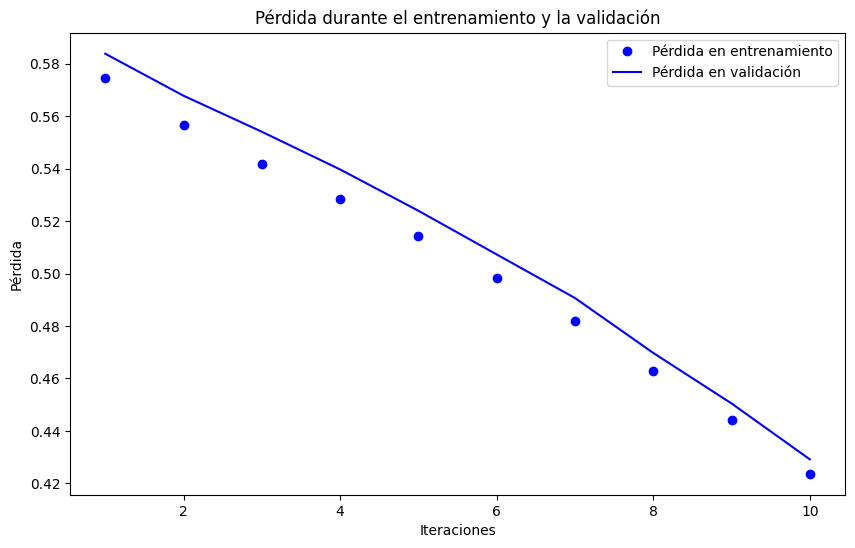

In [ ]:
# Obtener la pérdida del historial de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear un gráfico de línea para mostrar la pérdida durante el entrenamiento
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

161/161 [==============================] - 0s 1ms/step


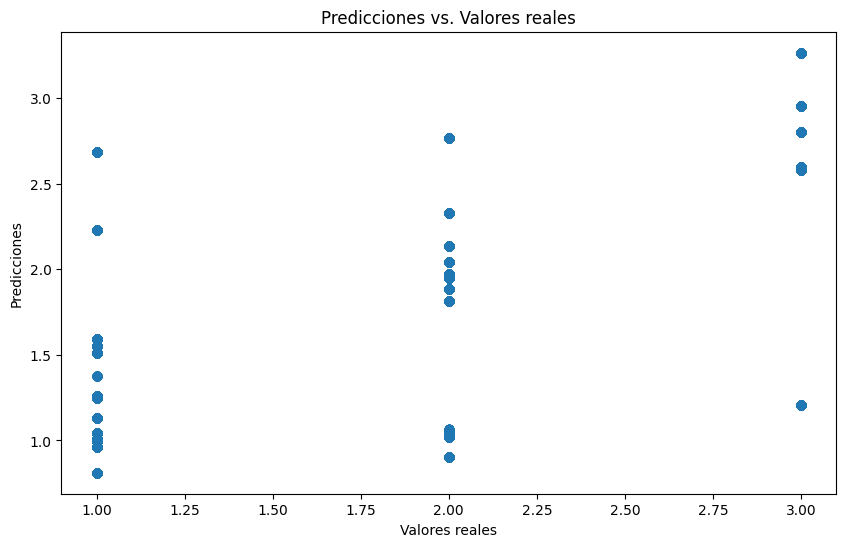

In [ ]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.show()

161/161 [==============================] - 0s 1ms/step


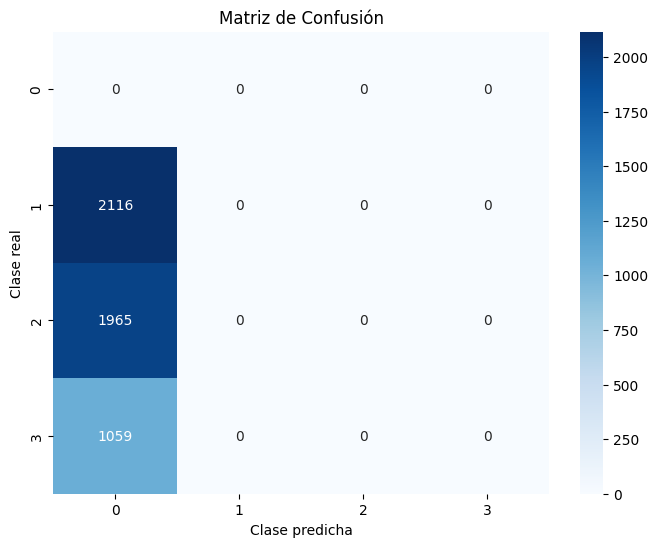

In [ ]:
# Obtener las probabilidades de las clases del modelo
probabilidades = model.predict(X_test)

# Obtener las clases predichas
predictions = np.argmax(probabilidades, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_test, predictions)

# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de Confusión')
plt.show()

#matriz de confusión

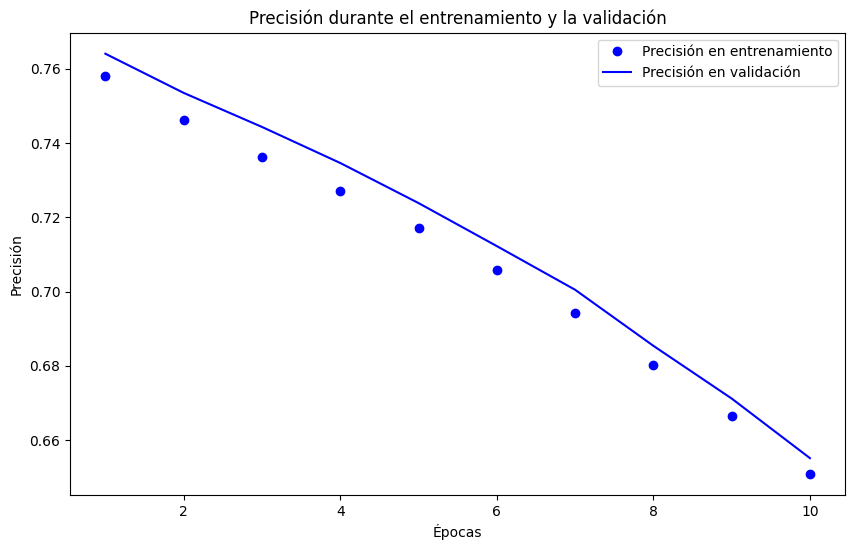

In [ ]:

accuracy = history.history['root_mean_squared_error']
val_accuracy = history.history['val_root_mean_squared_error']

plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo', label='Precisión en entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión en validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()



EVALUAR PREDICCION

Ahora es el momento de evaluar qué tan bueno es nuestro modelo. Añadimos una media móvil como línea de base. La razón por la que necesitamos una línea de base es para ver si nuestra puntuación RMSE y la puntuación de Spearman son realmente buenas, no solo debido a conjeturas aleatorias.

In [ ]:
def predict_and_calc_score(X, Y):
    # prediction of Y using the model
    pred = model.predict(X)
    # moving average of Y
    window_size = 12
    moving_average = np.apply_along_axis(
        lambda x: np.convolve(x, np.ones(window_size)/window_size, mode='same'), axis=0, arr=Y)
    moving_average = np.concatenate((np.zeros((1, Y.shape[1])), moving_average), axis=0)[:Y.shape[0]]

    # scale it back to the original scale
    pred_scaled = scaler_Y.inverse_transform(pred)
    moving_average_scaled = scaler_Y.inverse_transform(moving_average)
    Y_scaled = scaler_Y.inverse_transform(Y)

    # calculate the RMSE
    baseline_RMSE = np.sqrt(np.mean((Y_scaled - moving_average_scaled) ** 2))
    model_RMSE = np.sqrt(np.mean((Y_scaled - pred_scaled) ** 2))

    return Y_scaled, pred_scaled, moving_average_scaled, model_RMSE, baseline_RMSE

def plot_prediction(actual, prediction, moving_average):
    # Plot the actual values
    plt.plot(actual, label="True value", linestyle='-', linewidth=1, marker='s', markersize=1)

    # Plot the moving average
    plt.plot(moving_average, label="Moving Average", linestyle='--', linewidth=1, marker='s', markersize=1)

    # Plot the predicted values
    plt.plot(prediction, label="Prediction", linestyle='--', linewidth=1, marker='o', markersize=1)

    # Set the title and axis labels
    plt.title('Prediction vs. True Value', fontsize=16)
    plt.xlabel('Hour Timesteps')
    plt.ylabel('Output Value')

    # Add a legend to the plot
    plt.legend(loc='upper left', fontsize=12)

    # Display the plot
    plt.show()

In [ ]:
from scipy.stats import spearmanr

scaler_Y = StandardScaler()
scaler_Y.fit(Y_train)
train_actual, train_prediction, train_moving_average, train_RMSE, baseline_RMSE = \
    predict_and_calc_score(X_train, Y_train)

print("Train Moving Average RMSE:", baseline_RMSE)
print("Train Prediction RMSE:", train_RMSE)

corr, pval = spearmanr(train_actual, train_moving_average)
mov_spearman_corr = np.mean(corr)
corr, pval = spearmanr(train_actual, train_prediction)
pred_spearman_corr = np.mean(corr)


print("Train Moving Average Spearman Correlation:", mov_spearman_corr)
print("Train Prediction Spearman Correlation:", pred_spearman_corr)

643/643 [==============================] - 2s 3ms/step
Train Moving Average RMSE: 0.05162489484038039
Train Prediction RMSE: 0.48665821890416067
Train Moving Average Spearman Correlation: 0.9934766795216582
Train Prediction Spearman Correlation: 0.5698788374350952


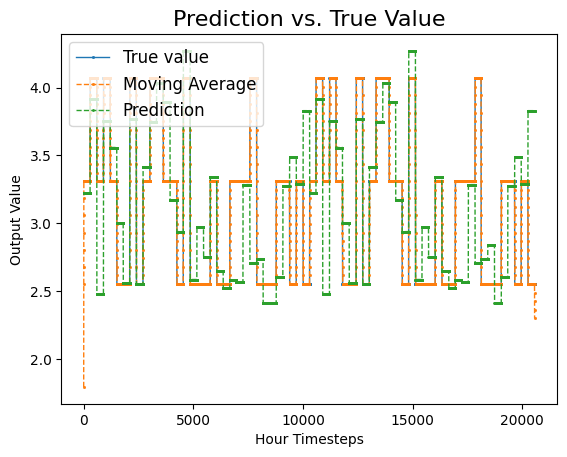

In [ ]:
location = 0
plot_prediction(train_actual[:,location], train_prediction[:,location], train_moving_average[:,location])

El tren RMSE y Spearman es bueno. Es mejor que la media móvil y muestra que el modelo no se está ajustando por debajo. Sin embargo, la verdadera prueba radica en la evaluación de la prueba (ya que los modelos de redes neuronales pueden sobreajustarse).

In [ ]:
train_actual, train_prediction, train_moving_average, train_RMSE, baseline_RMSE = \
    predict_and_calc_score(X_test, Y_test)

print("Train Moving Average RMSE:", baseline_RMSE)
print("Train Prediction RMSE:", train_RMSE)

corr, pval = spearmanr(train_actual, train_moving_average)
mov_spearman_corr = np.mean(corr)
corr, pval = spearmanr(train_actual, train_prediction)
pred_spearman_corr = np.mean(corr)


print("Train Moving Average Spearman Correlation:", mov_spearman_corr)
print("Train Prediction Spearman Correlation:", pred_spearman_corr)

161/161 [==============================] - 0s 1ms/step
Train Moving Average RMSE: 0.10325983294615886
Train Prediction RMSE: 0.49685697043146326
Train Moving Average Spearman Correlation: 0.9754756238301165
Train Prediction Spearman Correlation: 0.5530982595071745


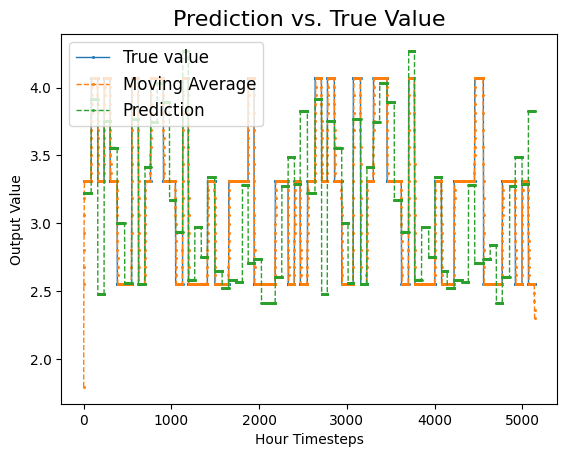

In [ ]:
location = 0
plot_prediction(train_actual[:, location], train_prediction[:, location], train_moving_average[:, location])

¡La prueba RMSE y Spearman también es buena! Es mejor que la media móvil y muestra que el modelo no está sobreajustado y puede generalizarse bien a nuevos datos.

DASHBOARD
- Implementado por medio de dataprep

In [ ]:

%%capture
!pip install sweetviz
!pip install dataprep


In [ ]:
!pip install pandas-profiling==3.4.0

  Using cached pandas_profiling-3.4.0-py2.py3-none-any.whl (315 kB)
  Using cached scipy-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.5 M

In [ ]:
import pandas as pd
import sweetviz as sv
from dataprep.eda import create_report

In [ ]:
reporte = sv.analyze(datos) ## Generamos nuestro reporte
reporte.show_html('ruta_especifica.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

Report ruta_especifica.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
subdata = datos[[	"#Veh_Disp_x_rut"	,"demanda"	,"DistRut_Km" ,"TimeRuta"	,"PromPasDia"]]

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [ ]:
'''Reporte'''
reporte = ProfileReport(subdata, title="ruta_especifica", minimal=False)
reporte.to_file("ruta_especifica.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/multimethod/__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
reporte.to_notebook_iframe()

TRATAR DE IMPLEMENTAR EL DASBOARD en un html con login


In [ ]:
!pip install streamlit -q
!pip install streamlit-lottie
!pip install Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.4/802.4 kB 4.3 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import requests
import base64
from streamlit_lottie import st_lottie
from PIL import Image

#Funcion para nuestra animacion
def load_lottieurl(url):
  r = requests.get(url)
  if r.status_code != 200:
    return None
  return r.json()


lottie_coding = load_lottieurl("https://lottie.host/00f648fc-be03-469c-975c-20c6565ce078/b8tZRrO3kE.json")
lottie_coding1 = load_lottieurl("https://lottie.host/3d5ee517-de54-4bf5-a42f-8c87c929dc5c/Bk2pUIGElP.json")
lottie_coding2 = load_lottieurl("https://lottie.host/f8d4f294-4c79-45bc-b12a-9d4c87191c95/yDDh1fOcbF.json")
lottie_coding3 = load_lottieurl("https://lottie.host/1841f931-dcac-4f79-8019-6093b483adfd/NkkWiU7O3w.json")

image_url = "/content/bnr-1.jpg"

with st.container():
    st.subheader("Hola bienvenidos a nuestro sitio web")
    st_lottie(lottie_coding1, height=300, key="coding_unique1")
    st.title("Red Neuronal predictoria para el transporte")
    st.write("Bienvenido a mi canal")
    st.write("[Más información >](https://www.youtube.com)", unsafe_allow_html=True)

with st.container():
    st.write("---")
    left_column, right_column = st.columns(2)
    with left_column:
        st.header("Nuestro Objetivo")
        st.write(
            """
            Texto aquí
            """
        )
        st.write("[Youtube >](https://youtube.com)")
    with right_column:
        st_lottie(lottie_coding2, height=300, key="coding_unique2")

with st.container():
    st.write("---")
    left_column, right_column = st.columns(2)
    with left_column:
        st.header("Repositorio")
        st.write(
            """
            https://github.com/juannMGC/ING-SOFTWARE-II
            """
        )
        st.write("[Youtube >](https://youtube.com)")
    with right_column:
        st_lottie(lottie_coding, height=300, key="coding_unique3")


# Sección de inicio de sesión
with st.container():
    st.write("---")
    st.header("Inicio de Sesión")
    # Credenciales válidas
    credenciales_validas = {
        "usuario1": "contraseña1",
        "usuario2": "contraseña2"
    }

    # Función para verificar las credenciales
    def verificar_credenciales(usuario, contraseña):
        if usuario in credenciales_validas:
            if contraseña == credenciales_validas[usuario]:
                st.session_state["sesion_iniciada"] = True
                st.success("Inicio de sesión exitoso. ¡Bienvenido, {}!".format(usuario))
            else:
                st.error("Contraseña incorrecta. Por favor, inténtalo nuevamente.")
        else:
            st.error("Usuario no encontrado. Por favor, inténtalo nuevamente.")


    # Interfaz de usuario
    usuario_input = st.text_input("Usuario", placeholder="Usuario")
    contraseña_input = st.text_input("Contraseña", type="password", placeholder="Contraseña")
    iniciar_sesion_boton = st.button("Iniciar sesión")

    # Manejo de eventos
    if iniciar_sesion_boton:
        verificar_credenciales(usuario_input, contraseña_input)

###maloooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
# Botones para acciones adicionales
# Botón para recuperar contraseña por nombre de usuario

with st.container():
    if st.button("¿Olvidaste la contraseña?"):
        st.header("Recuperar Contraseña")
        st.write("##")

        username = st.text_input("Ingresa tu nombre de usuario", max_chars=100)
        recover_button = st.button("Recuperar")

        if recover_button and username:
            if username in credenciales_validas:
                password = credenciales_validas[username]
                st.info(f"La contraseña asociada al usuario '{username}' es: {password}")
            else:
                st.error("El nombre de usuario proporcionado no existe.")
        elif recover_button and not username:
            st.error("Por favor, ingresa tu nombre de usuario antes de recuperar la contraseña.")



# Variable de estado para indicar si el registro fue exitoso
registro_exitoso = False

with st.container():
    col1, col2, col3 = st.columns([1, 6, 1])
    with col1:
        st.write("")
    with col2:
        if st.button("¿No tienes Cuenta? Registrate"):
            nuevo_usuario = st.text_input("Nuevo Usuario")
            nueva_contraseña = st.text_input("Nueva Contraseña", type="password")
            if st.button("Registrar"):
                if nuevo_usuario and nueva_contraseña:
                    credenciales_validas[nuevo_usuario] = nueva_contraseña
                    # Indicar que el registro fue exitoso
                    registro_exitoso = True
                else:
                    st.error("Por favor ingresa un nombre de usuario y contraseña válidos.")
    with col3:
        st.write("")

# Mostrar mensaje de éxito si el registro fue exitoso
if registro_exitoso:
    st.success("Usuario registrado exitosamente. Por favor, inicia sesión.")
###maloooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo

# Contenido después de iniciar sesión
if st.session_state.get("sesion_iniciada"):
    with st.container():
        st.header("Bienvenido al Dashboard")

        # Ruta al archivo HTML
        ruta_html = "/content/ruta_especifica.html"

        # Mostrar el contenido del archivo HTML
        with open(ruta_html, "r") as file:
            contenido_html = file.read()
            st.components.v1.html(contenido_html, width=1000, height=7000)

            col1, col2 = st.columns([2,1])

            col1.markdown(" # Incidencias a reportar! ")
            col1.markdown(" Aquí va algo de información. ")

            datos = col2.file_uploader(" Carga aquí tu archivo de datos.csv ")

            foto = col2.camera_input(" Tomar foto ")
            col2.success(" Tu foto se cargo correctamente! ")


# contacto
email_address = "emailcontact@gmail.com"

with st.container():
    st.write("---")
    st.header("Ponte en contacto con nosotros!")
    st.write("##")

    name = st.text_input("Tu nombre", max_chars=100)
    email = st.text_input("Tu email", max_chars=100)
    message = st.text_area("Tu mensaje aquí", max_chars=500)

    if st.button("Enviar"):
        if name and email and message:
            # Aquí podrías agregar la lógica para enviar el mensaje por correo electrónico o realizar alguna acción
            st.success("¡Mensaje enviado con éxito!")
        else:
            st.error("Por favor, completa todos los campos antes de enviar el mensaje.")

# Botón para cerrar sesión
if st.session_state.get("sesion_iniciada", False):
    if st.button("Cerrar sesión"):
        st.session_state.pop("sesion_iniciada")
        st.experimental_rerun()

Writing app.py


In [ ]:
 !wget -q -O - ipv4.icanhazip.com

104.154.51.68


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.154.51.68:8501

npx: installed 22 in 2.767s
your url is: https://tired-facts-boil.loca.lt
2024-04-23 01:19:27.115 Please replace `st.experimental_rerun` with `st.rerun`.

`st.experimental_rerun` will be removed after 2024-04-01.
  Stopping...
^C
